## Machine Learning - Lista 1
### Aluno: Douglas Gaspar Feitosa Freitas
### Matrícula: 473552

## Questão 1

Considere o conjunto de dados disponível em **articial1d.csv** organizado em
duas colunas, *x* e *y*. Seja um modelo de regressão linear para *ŷ* = *f(x)*.

##### a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo **OLS (mínimos quadrados ordinários)**. Plote a reta resultante sobre os dados.

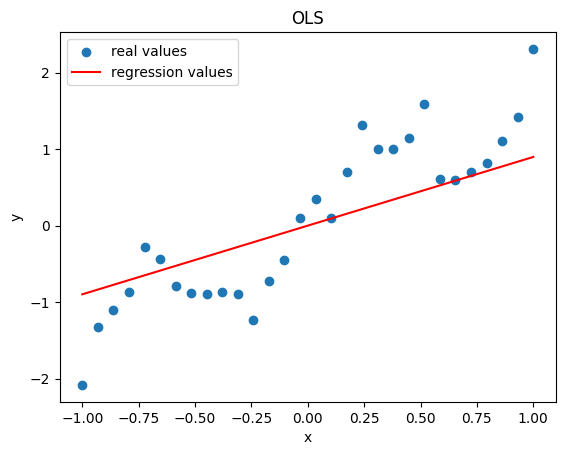

MSE: 0.20089040610178371


In [1]:
## Base ##
import numpy as np
import matplotlib.pyplot as plt

# Define MSE
def mse(y, pred):
    return np.mean((y - pred) ** 2)

artificial1d = np.genfromtxt('./artificial1d.csv', delimiter=',')                    #Carrega dataset
xRaw = artificial1d[:, [0]]                                                          #Cópia raw do x do dataset
xMean = np.mean(xRaw, axis = 0)                                                      #Calcula média de X
xSigma = np.std(xRaw, axis = 0)                                                      #Calcula STD de X
xNormalized = ((xRaw - xMean) / xSigma)                                              #Normaliza X
X = np.append(np.ones((artificial1d[:, [0]].shape[0], 1)), xNormalized, axis=1)      #Define X

yRaw = artificial1d[:, [1]]                                                          #Cópia raw do y do dataset
yMean = np.mean(yRaw, axis = 0)                                                      #Média do y
ySigma = np.std(yRaw, axis = 0)                                                      #STD do y
y = ((yRaw - yMean)/ySigma)                                                          #Normaliza o y

## Resposta Q1.a ##

# Define OLS
def ols(X, y):
    return np.linalg.inv(X.T@X) @ X.T @ y

w = ols(X, y)                                                                        #Calcula w
pred = X @ w                                                                         #Calcula ŷ
pred = pred * ySigma + yMean                                                         #Desfaz a normalização

plt.title("OLS")
xTest = np.c_[np.ones(100), np.linspace(xRaw.min(), xRaw.max(), 100)]                #Constroi gráfico pelo matplotlib
plt.scatter(xRaw, yRaw, label='real values')
plt.plot(xTest[:,1], xTest @ w, color="red", label='regression values')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("MSE:", mse(y, pred))

##### b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo **GD (gradiente descendente)**. Plote a reta resultante sobre os dados.

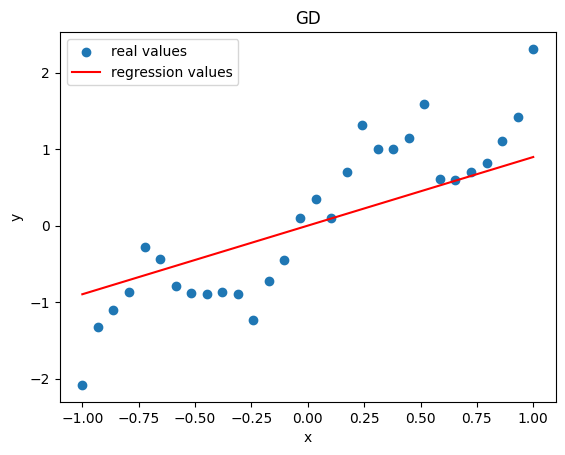

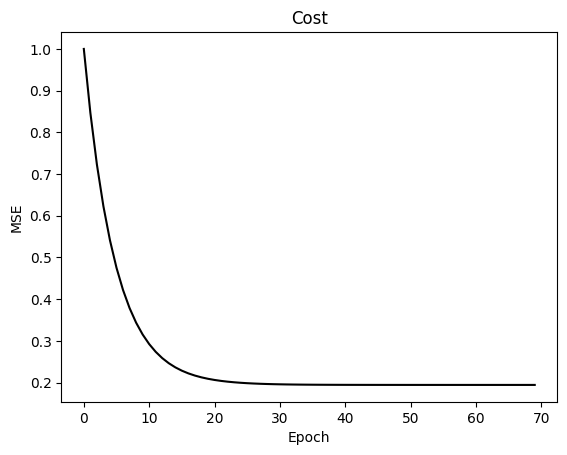

In [109]:
## Resposta Q1.b ##
alpha = 0.1                                              #define alpha

# Inicializa parâmetros em 0
w = np.zeros((X.shape[1],1))

def GD(w, y, pred, epoch):                                #define o algoritmo do Gradiente Descendente
    errorHistory = np.zeros(epoch)
    t = 0                                                #define t
    for t in range(epoch):                               #enquanto t for menor ou igual ao máximo
        pred = X @ w                                     #calcula ŷ
        error = y - pred                                 #calcula o erro
        
        w = w + alpha * (X.T @ error)/error.shape[0]     #atualiza os parâmetros

        errorHistory[t] = mse(y, pred)                   #guarda o MSE em um histórico
        
    return [errorHistory, w]                             #retorna o histórico e os parâmetros
    
results = GD(w, y, pred, 70)

plt.title("GD")
xTest = np.c_[np.ones(100), np.linspace(xRaw.min(), xRaw.max(), 100)]
plt.scatter(xRaw, yRaw, label='real values')
plt.plot(xTest[:,1], xTest @ results[1], color="red", label='regression values')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.title("Cost")
plt.plot(results[0], color="black")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

##### c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo **SGD (gradiente descendente estocástico)**. Plote a reta resultante sobre os dados.

error: (1, 1)
pred: (1, 1)
PermX[[i]]: (1, 2)
w: (2, 1)


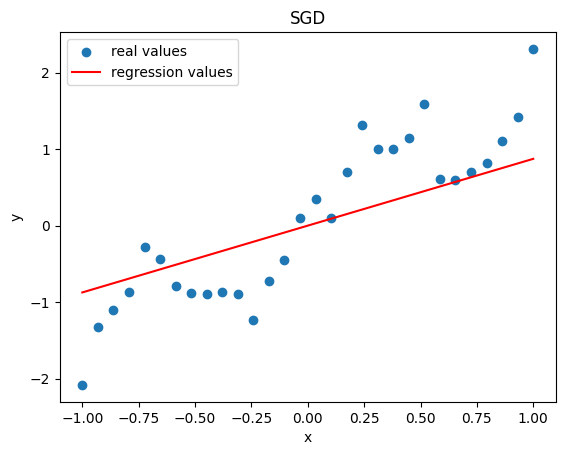

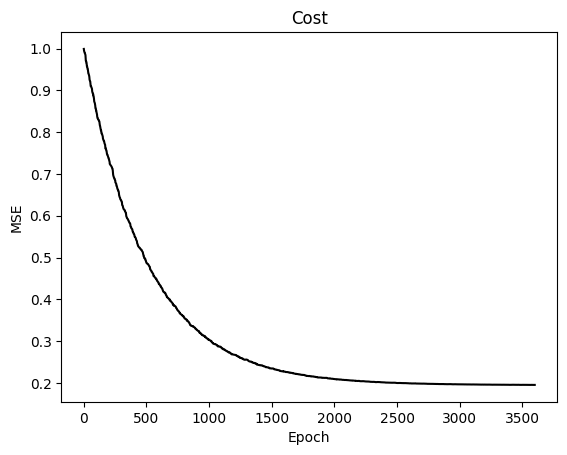

In [59]:
## Resposta Q1.c ##
alpha = 0.001                                                  #define alpha

# Inicializa parâmetros em 0
w = np.zeros((X.shape[1],1))

def SGD(X, w, y, pred, epoch):                               #define o algoritmo do Gradiente Descendente
    errorHistory = []
    t = 0                                                    #define t
    for t in range(epoch):                                   #enquanto t for menor ou igual ao máximo
        PermX = X                                            #np.random.permutation(X) (Aparentemente permutar o X em si não funciona) ¯\_(ツ)_/¯
        for i in np.random.permutation(X.shape[0]):          #range(X.shape[0]):// permuta o i ao invés do X agora
            pred = PermX[[i]] @ w                                   #calcula ŷ
            error = y[i] - pred                                 #calcula o erro
            if ((t==15) and (i==15)): print("error:",error.shape)            #debugging
            if ((t==15) and (i==15)): print("pred:",pred.shape)
            if ((t==15) and (i==15)): print("PermX[[i]]:",PermX[[i]].shape)
            if ((t==15) and (i==15)): print("w:",w.shape)
            w = w + alpha * (PermX[[i]].T * error)           #atualiza os parâmetros. Se o PermX não for transposto, o w ganha uma dimensão extra

            errorHistory.append(mse(y, X @ w))               #guarda o MSE em um histórico
        
    return [errorHistory, w]                                 #retorna o histórico e os parâmetros
    
results = SGD(X, w, y, pred, 120)

plt.title("SGD")
xTest = np.c_[np.ones(100), np.linspace(xRaw.min(), xRaw.max(), 100)]
plt.scatter(xRaw, yRaw, label='real values')
plt.plot(xTest[:,1], xTest @ results[1], color="red", label='regression values')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.title("Cost")
plt.plot(results[0], color="black")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

##Questão 2

Considere o conjunto de dados disponível em **california.csv**, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em *https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset*.

##### a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [65]:
california = np.genfromtxt('./california.csv', delimiter=',')

def dsDivide(dataset, ratio):
    
    np.random.shuffle(dataset)
    
    trainX = dataset[:,:-1][:int(len(dataset)*ratio)]
    trainY = dataset[:,[-1]][:int(len(dataset)*ratio)]
    testX = dataset[:,:-1][int(len(dataset)*ratio):]
    testY = dataset[:,[-1]][int(len(dataset)*ratio):]
    
    return [trainX, trainY, testX, testY]

dataset = dsDivide(california, 0.8)

trainX = dataset[0]
trainY = dataset[1]
testX = dataset[2]
testY = dataset[3]

print("Train X:", trainX.shape, "| Train Y:", trainY.shape, "| Test X:", testX.shape, "|Test Y:", testY.shape)

Train X: (800, 8) | Train Y: (800, 1) | Test X: (200, 8) |Test Y: (200, 1)


##### b) Treine 13 modelos de **regressão polinomial**, com ordens de 1 a 13. Você pode usar o algoritmo OLS.

##### c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

In [85]:
def dsNormalize(x):
    return (x - np.mean(x, axis = 0)) / np.std(x, axis = 0)

def dsDeNormalize(x):
    return x * np.std(x, axis = 0) + np.mean(x, axis = 0)

def prepareX(x):
    return np.append(np.ones((x.shape[0], 1)), dsNormalize(x), axis=1)

def rmse(y, pred):
    return np.mean((y - pred) ** 2) ** 0.5

testX = prepareX(trainX)
testY = dsNormalize(trainY)

w = ols(testX, testY)                                                                        #Calcula w
pred = testX @ w                                                                         #Calcula ŷ
pred = dsDeNormalize(pred)

print(pred.shape)

## Sem tempo ##

(800, 1)


## Sem tempo

01/04/2024 23:53:10